# Employee Attrition & Performance

Many employers have been struggling for ages with the perennial problem of keeping their employees happy and satisfied. It takes more time and energy to look for a replacement when employees leave.

**Problem Statement:** To identify the employees that have a propensity to leave and to determine why they are leaving.

**Approach:** This is a classification problem where we have to predict which emplyees whould leave and who would stay.

**Hypothesis Generatiom:** This is an important step in the data science/Machine Learning pipeline as it involves understanding the problem in detail. The following are some of the hypothesis we can deduce from the problem:
1. Employees who are less satisfied with their jobs are more likely to leave.
2. Employees working on a lot of projects may be overwhelemed and therefore leave, at the same time, employees working on very few projects may feel their skills are underutilized and leave.
3. Employees who haven't recieved any promotions over the last five years are likely to leave.
4. The working culture in some departments might lead to higher chances of employees leaving.
5. Well-paid or employees with high salaries are unlikely to leave.

The next step is to validate or invalidate the above hypothesis through Exploratory Data Analysis.(EDA)

Solution Submission Link: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/?utm_source=auto-email#MySubmissions

In [41]:
#importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  #to ignore warnings

**Data Preparation**

In [2]:
#loading the dataset
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#understanding the dataset
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#checking the datatype
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are both categorical and integer varaibles in the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
#checking for null values


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#check for duplicates


0

There are neither missing values nor duplicated rows in the dataset

## Exploratory Data Analysis(EDA)

**Univariate Analysis**

Examing the data in each column individually using frequency tables, barplots, probability density plot e.t.c.

In [8]:
#Attrition Level


No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
#normalizing the propotions


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<AxesSubplot:>

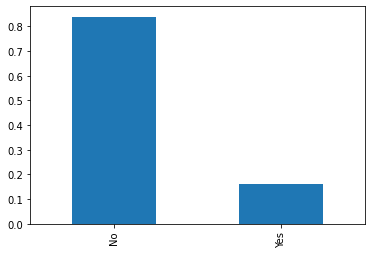

In [10]:
#normalizing the propotions- visualization


The above analysis shows that there are 1233 employees who stayed while 237 left, that is about 84%. or a 16% churn rate.

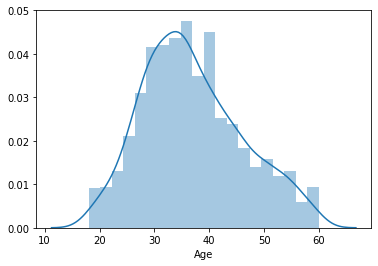

In [11]:
#age distribution


The age values are normally distributed with majority of employees being between the ages 30 to 40.

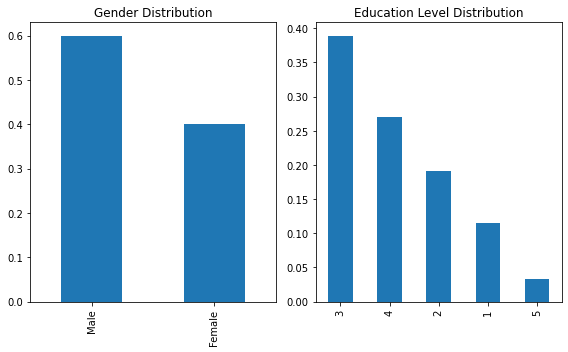

In [12]:
# visualizing the distribution of categorical variables


There are more male than female employees. Most employees have an education level of 3.

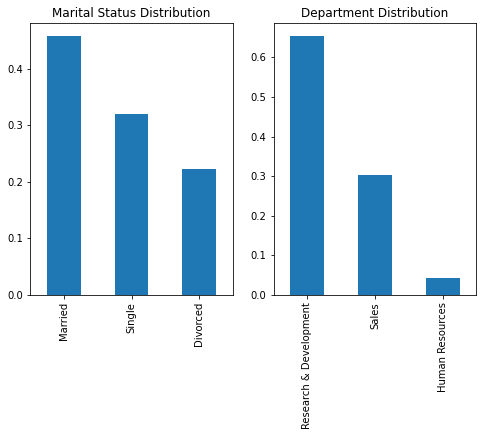

In [13]:
#visualizing Marital Status & Department


Most of the employees are married. Most employees are in the Research and Development Department.

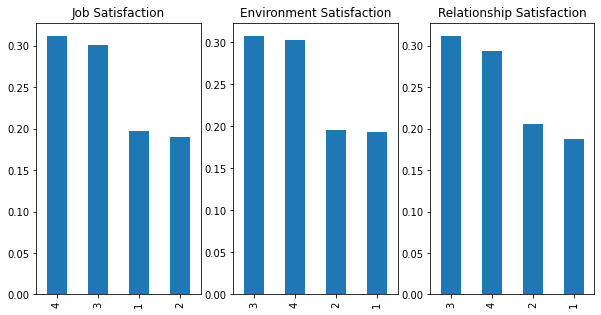

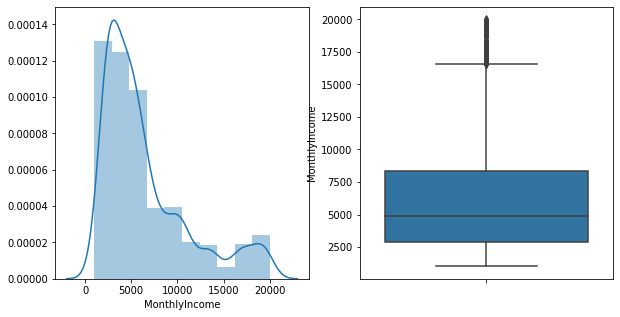

In [15]:
#visualizing numerical variables


We can infer from the above plot that most employees earn between 3000 to $8000. There are also outliers from the box plot, employees earning higher amount of salaries.

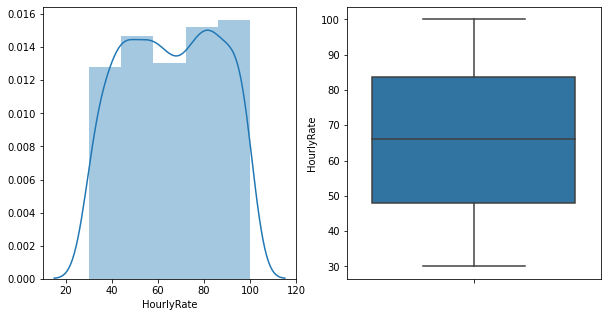

In [16]:
#visualizing numerical variables


<AxesSubplot:title={'center':'WorkLifeBalance'}>

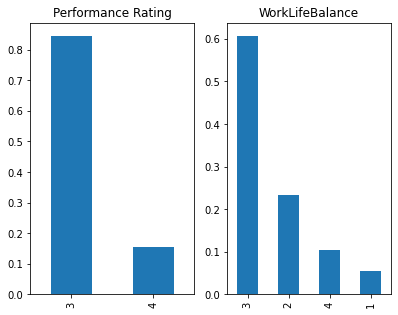

In [17]:
#develop bar plots for performance rating and work life balance


<AxesSubplot:>

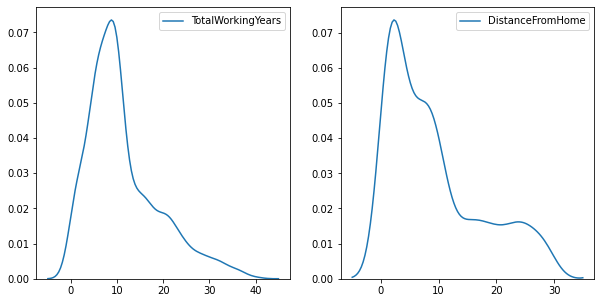

In [18]:
#visualizing numerical variables for total working years and distance fro mhome


Most employees have worked for about 10 years at the company. Most employees live closer to the company. between 1 to 5 km.

**Bivariate Analysis**

In [19]:
# bivariate analysis function
def bivariate_analysis(var):
    #getting the relationship between the target variable and categorical independent variables
    #crosstab
    category = pd.crosstab(dataset[var],dataset['Attrition'])

    #stacked bar plot to show propotion of approved and unapproved loans.
    category.div(category.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked=True,figsize = (4,4))
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(loc =4)
    plt.show()
    

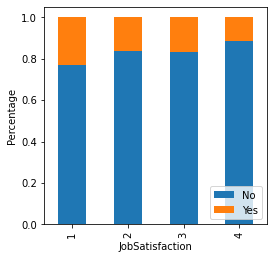

In [20]:
#comparing job satisfaction and propensity to leave


We can infer from the above plot, that employees who are less satisfied with their jobs have a higher propensity to leave.

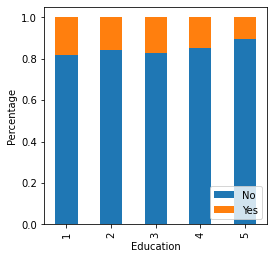

In [21]:
#comparing Education and Attrition


Highly educated employees have a lower propensity to leave.

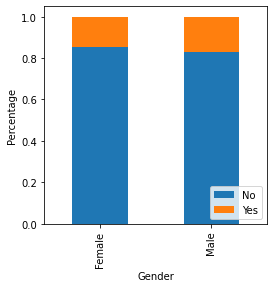

In [22]:
#comparison between Gender and propensity to leave


There is no significant difference between Male and Female employees leaving.

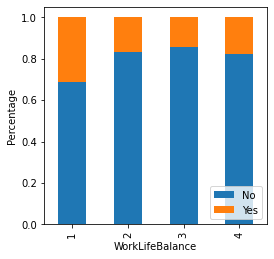

In [23]:
#WorkLIfe Balance


Employees with a poor work life balance have a higher propensity to leave

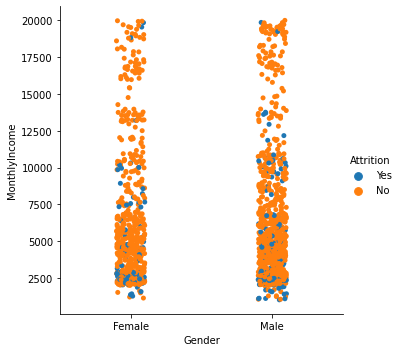

In [24]:
#Income Distribution


There is an equal income distribution between Male and Female employees

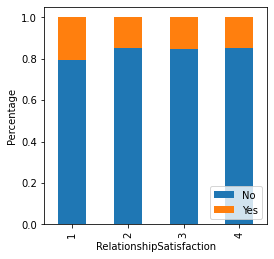

In [25]:
#Relationship satisfaction


Employees less satisfied with their relationships at work have a higher propensity to leave

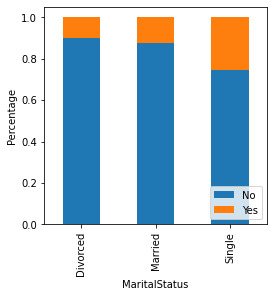

In [26]:
#Marital Status


Employees who are single have a higher propensity to leave.

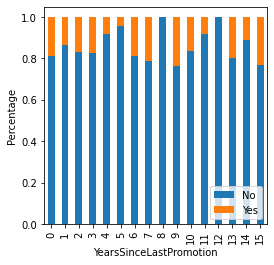

In [27]:
#Promotions
#'YearsSinceLastPromotion'

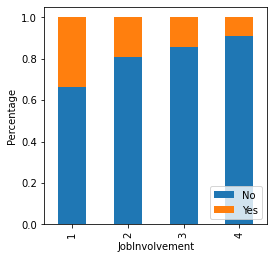

In [28]:
#Number of projects
#JobInvolvement

Employees who are not as involved in their work have a higher propensity to leave.

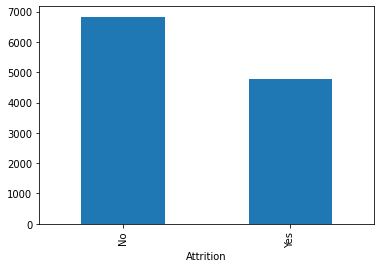

In [29]:
#Income distribution and propensity to leave
#dataset.groupby('Attrition')['MonthlyIncome'].mean().plot.bar();

Employees with lower income have a higher propensity to leave.

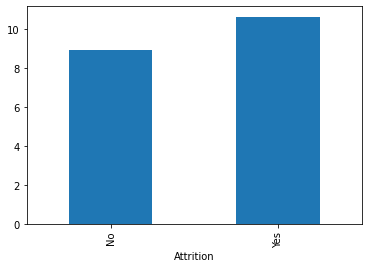

In [30]:
#Income distribution and propensity to leave
#dataset.groupby('Attrition')['DistanceFromHome'].mean().plot.bar();

Employees who live far away have a higher propensity of leaving.

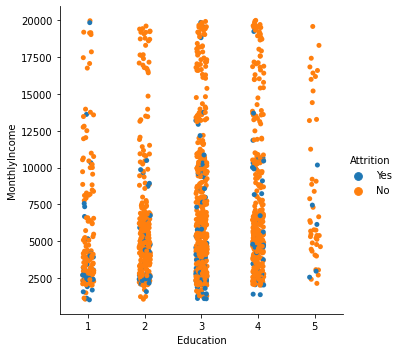

In [31]:
#comparing Education and Monthly Income
#sns.catplot(x = 'Education', y = 'MonthlyIncome',hue = 'Attrition', data = dataset)

Income is well-distributed across all Education Levels. Even the more educated employees recieve almost the same income, unlike one would expect for more educated empolyees to be earning higher income.

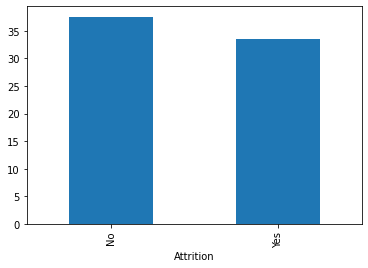

In [32]:
# Age and propensity to leave
#dataset.groupby('Attrition')['Age'].mean().plot.bar();

In [34]:
dataset.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [38]:
#replacing the Yes and No in the Attrition column with 1 and 0


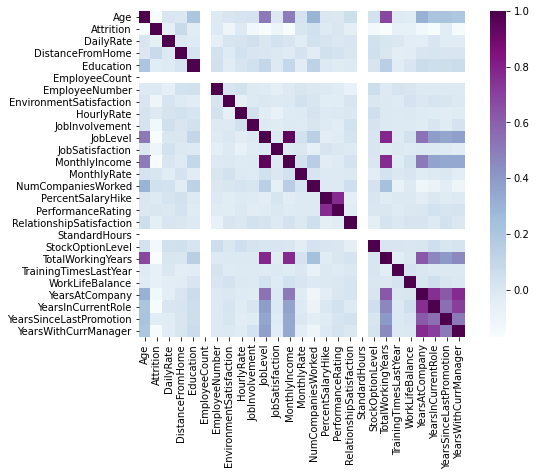

In [40]:
#correlation matrix
#f,ax = plt.subplots(figsize = (9,6))
#sns.heatmap(dataset.corr(), square = True,cmap = 'BuPu');


We can infer the following from the above correlation matrix:
1. Age of the employees is closely corelated with Total Working Years, Monthly Income and the Job Level.
2. Performace rating is correlated with percent salary hike. 
3. The parameters that show some corelation with Attrition are: Distance from Home.
